# Разведывательный анализ данных (EDA) Dataset условий жизни учащихся и их успеваемость по математике

# 1. Анализ и очистка данных

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import itertools 
from IPython.display import display

In [173]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [174]:
df.isnull().sum(axis = 0) # посмотрим сколько значений NaN по каждому столбцу:

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Заменим значения на None

In [175]:
def change_none(column):
    df[column] = df[column].apply(lambda x: None if pd.isna(x) == True else x)
    return (column)

for col in df.columns:
    change_none(col)

In [176]:
display(df.head(10)) # посмотрим содержание датасета

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Напишем функцию, заменяющую значения None на значения моды

In [177]:
def change_mode(column):
    # присвоим значениям NaN значение моды
    return df[column].fillna((int(df[column].mode())), inplace=True)

Напишем функцию, заменяющую значения None для качественных переменных на самое часто встречающееся значение

In [178]:
def change_max(column):
    # присвоим значениям NaN самое частое значение
    return df[column].fillna((df[column].value_counts().idxmax()), inplace=True)

Функция распределения значений:

In [179]:
def rasp(column):
    # посмотрим распределение значений
    return pd.DataFrame(df[column].value_counts())

Функция уникальныйх значений: 

In [180]:
def uniq(column):
    return df[column].unique()  # посмотрим уникальные значения

Для удобства использования pandas переименуем столбцы:

In [181]:
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu',
              'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
              'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
              'freetime', 'goout', 'health', 'absences', 'score']

Функция, которая заменяет значения NaN на значение моды у количественных столбцов (не используем массово, до анализа каждого столбца)

In [182]:
# for col in ['age', 'Medu', 'Fedu',
##       'traveltime', 'studytime',
# 'failures', 'studytime' , 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
# change_mode(col)

Функция, которая заменяет значения NaN на самое частое значение у качественных столбцов (не используем массово, до анализа каждого столбца)

In [183]:
# for col in ['school','sex','address','famsize','pstatus','mjob','fjob','reason','guardian',
# 'failures','schoolsup','famsup','paid','activities','nursery',
# 'studytime_granular','higher','internet','romantic']:
# change_max(col)

Функция просмотра уникальных значений всех столбцов

In [184]:
# for col in ['school','sex','age','address','famsize','pstatus','medu',
# 'fedu','mjob','fjob','reason','guardian','traveltime','studytime',
# 'failures','schoolsup','famsup','paid','activities','nursery',
# 'studytime_granular','higher','internet','romantic','famrel',
# 'freetime','goout','health','absences','score']:
# display(uniq(col))

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [185]:
display(df.head(10))
df.info()
len(df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

395

In [186]:
df.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


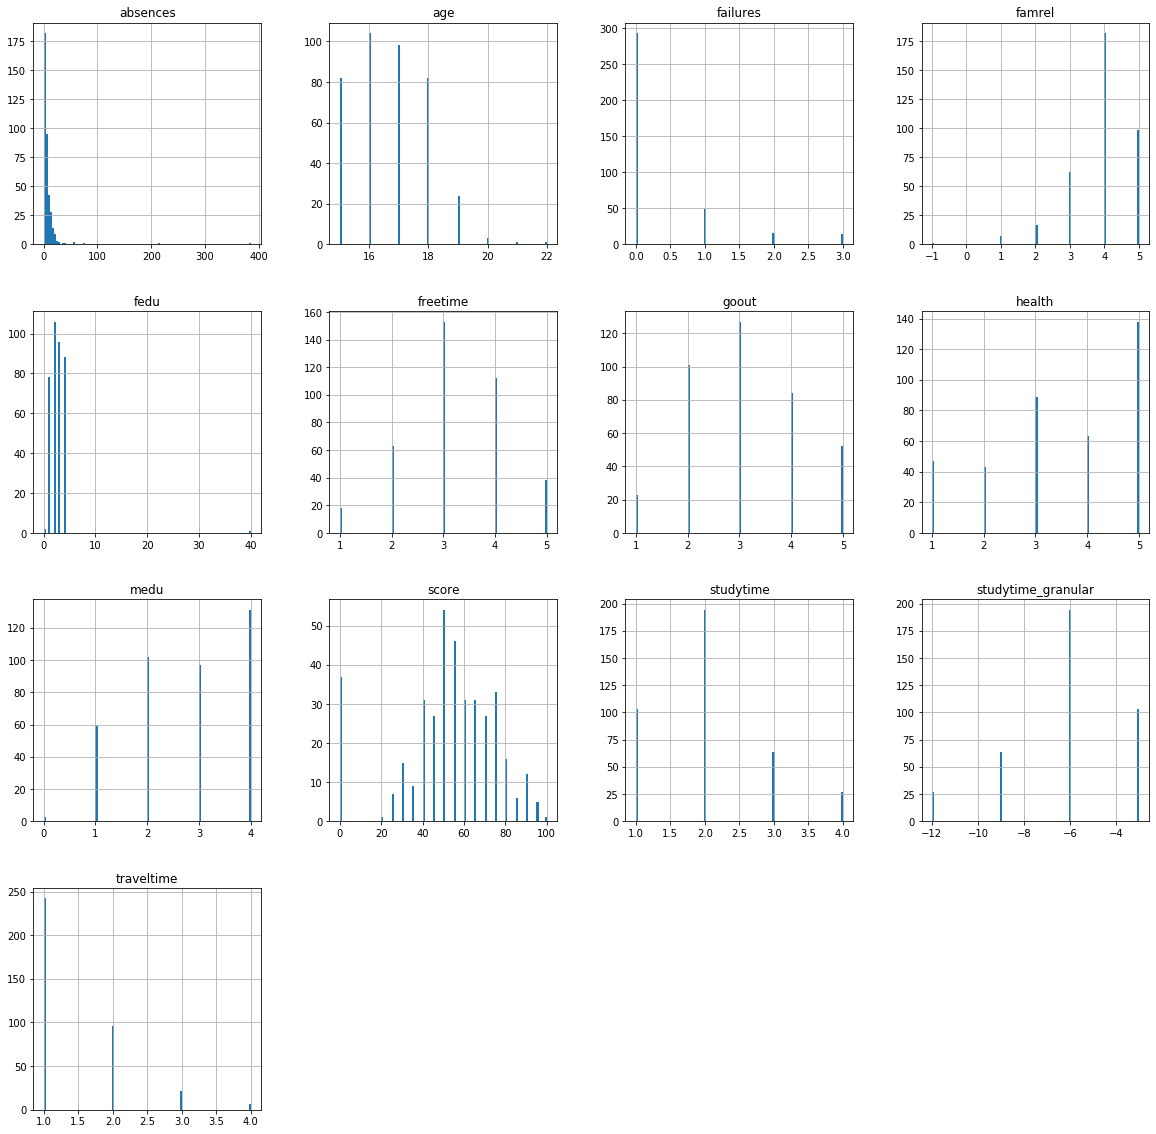

In [187]:
smth = df.hist(figsize=(20, 20), bins=100)

Оценим графики с количественными переменными: 
1.  failures — количество внеучебных неудач. Большинство значений = 0.
2. famrel — семейные отношения, попало значение -1 (ошибочно)
3. fedu - ощибочно попало значение 40
4. score - большое количество нулевых значений. Примем, что значение 0 - провал экзамена, а не неявка. 
5. studytime_granular - не известное значение

Строковые: 
school 
sex 
address
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid 
activities
nursery
higher
internet
romantic

Количественные: 
age 
famsize
Medu
Fedu
traveltime 
studytime 
failures 
famrel
freetime
goout
health
absences
score

Теперь рассмотрим все столбцы по отдельности и заменим значения None на подходящие:

Age

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

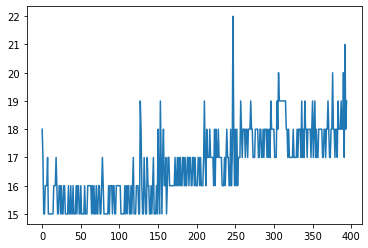

In [188]:
plt.plot(df.age)
display(rasp('age'))
display(uniq('age'))

Видим выбросы. Воспользуемся формулой интерквартильного расстояния (межквартильного размаха). 

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


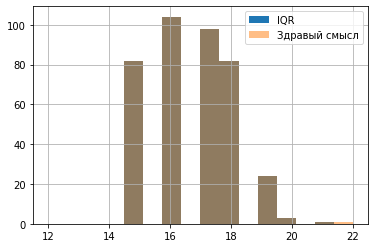

In [189]:
# посмотрим границы выбросов
median = df.age.median()
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df.age.loc[df.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
           ].hist(bins=16, range=(12, 22), label='IQR')
df.age.loc[df.age <= 100].hist(
    alpha=0.5, bins=16, range=(12, 22), label='Здравый смысл')
plt.legend()

Удалим выброс, исходя из границ:

In [190]:
df = df.loc[df.age <= 21]
display(df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,-3.0,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


School

Посмотрим, сколько школ содержит наш датасет.

,school
GP,348
MS,46


array(['GP', 'MS'], dtype=object)

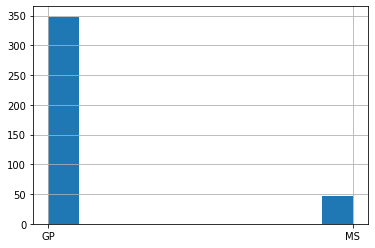

In [191]:
df.school.hist()
display(rasp('school'))
display(uniq('school'))

Sex

,sex
F,208
M,186


array(['F', 'M'], dtype=object)

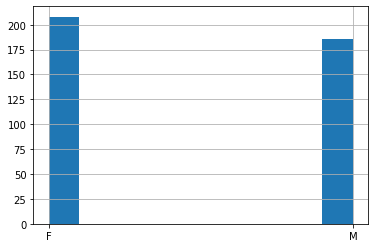

In [192]:
df.sex.hist()
display(rasp('sex'))
display(uniq('sex'))

address 

,address
U,294
R,83


array(['U', None, 'R'], dtype=object)

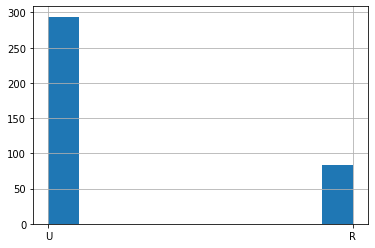

In [193]:
df.address.hist()
display(rasp('address'))
display(uniq('address'))

Заменим пустые значения на самые более встречающиеся:

In [194]:
change_max('address')  # используем функцию, заданную вначале
##df['address'].fillna((df.address.value_counts().idxmax()), inplace=True)
display(uniq('address'))

array(['U', 'R'], dtype=object)

famsize 

,famsize
GT3,260
LE3,107


array([None, 'GT3', 'LE3'], dtype=object)

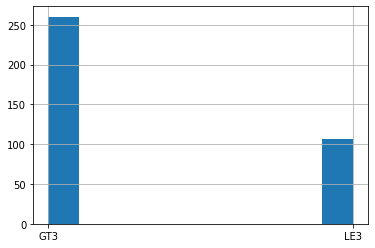

In [195]:
df.famsize.hist()
display(rasp('famsize'))
display(uniq('famsize'))

In [196]:
change_max('famsize')  # заменим none на самое встречающееся значение
df.famsize.unique()

array(['GT3', 'LE3'], dtype=object)

Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

,pstatus
T,313
A,36


array(['A', None, 'T'], dtype=object)

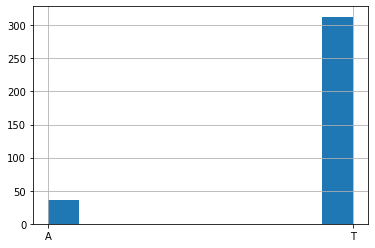

In [197]:
df.pstatus.hist()
display(rasp('pstatus'))
display(uniq('pstatus'))

In [198]:
change_max('pstatus')
df.pstatus.unique()

array(['A', 'T'], dtype=object)

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

,medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


array([ 4.,  1.,  3.,  2., nan,  0.])

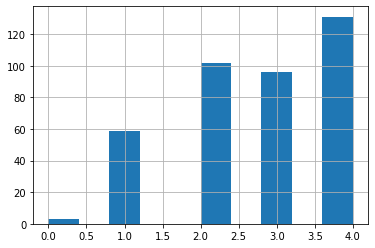

In [199]:
df.medu.hist()
display(rasp('medu'))
display(uniq('medu'))

In [200]:
change_mode('medu')
df.medu.unique()

array([4., 1., 3., 2., 0.])

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


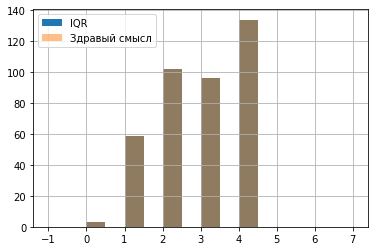

In [201]:
# посмотрим границы выбросов
median = df.medu.median()
IQR = df.medu.quantile(0.75) - df.medu.quantile(0.25)
perc25 = df.medu.quantile(0.25)
perc75 = df.medu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

df.medu.loc[df.medu.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(-1, 7), label='IQR')
df.medu.loc[df.medu <= 100].hist(alpha=0.5, bins=16, range=(-1, 7),
                                 label='Здравый смысл')
plt.legend()

Выброс 0, когда у матери ученика нет образования попадает в границы выбросов и не требует удаления. 

в случае, если все таки для конкретных методов понадобиться удаление значение 0, воспользуемся командой:

In [202]:
# df = df.loc[df.medu >= 1]
# display(df)

 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

,fedu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


array([ 4.,  1.,  2.,  3., 40., nan,  0.])

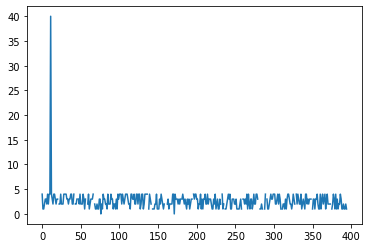

In [203]:
plt.plot(df.fedu)
display(rasp('fedu'))
display(uniq('fedu'))

In [204]:
df['fedu'].loc[df["fedu"] == 40] = 4  # заменим ошибочное значение 40 на 4
change_mode('fedu')
df.fedu.unique()

array([4., 1., 2., 3., 0.])

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


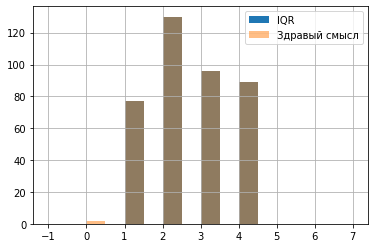

In [205]:
# посмотрим границы выбросов
median = df.fedu.median()
IQR = df.fedu.quantile(0.75) - df.fedu.quantile(0.25)
perc25 = df.fedu.quantile(0.25)
perc75 = df.fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

df.fedu.loc[df.fedu.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(-1, 7), label='IQR')
df.fedu.loc[df.fedu <= 100].hist(alpha=0.5, bins=16, range=(-1, 7),
                                 label='Здравый смысл')
plt.legend()

В данном случае значенние 0 не попадает в границы и является выбросом. Воспользуемся командой для удаления выброса:

In [206]:
df = df.loc[df.fedu >= 1]
display(df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,-3.0,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

,mjob
other,132
services,97
at_home,58
teacher,54
health,32


array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

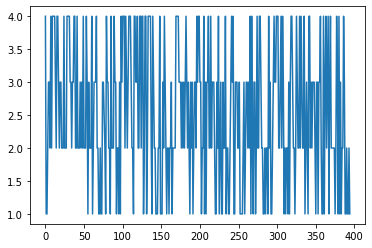

In [207]:
plt.plot(df.fedu)
display(rasp('mjob'))
display(uniq('mjob'))

In [208]:
change_max('mjob')  # заменим на самое часто встречаемое значение все None
df.mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

,fjob
other,195
services,101
teacher,29
at_home,16
health,15


array(['teacher', 'other', None, 'health', 'services', 'at_home'],
      dtype=object)

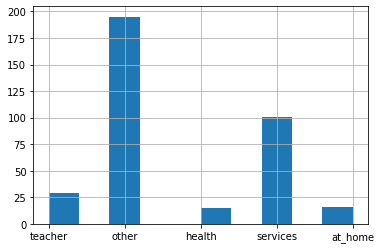

In [209]:
df.fjob.hist()
display(rasp('fjob'))
display(uniq('fjob'))

In [210]:
change_max('fjob')  # заменим на самое встречающееся значение все None
df.fjob.unique()

array(['teacher', 'other', 'health', 'services', 'at_home'], dtype=object)

 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

,reason
course,136
home,104
reputation,102
other,33


array(['course', 'other', 'home', 'reputation', None], dtype=object)

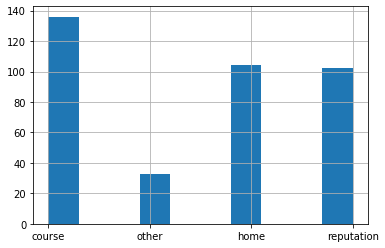

In [211]:
df.reason.hist()
display(rasp('reason'))
display(uniq('reason'))

In [212]:
change_max('reason')  # заменим на максимальное значение все None
df.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

,guardian
mother,247
father,86
other,28


array(['mother', 'father', 'other', None], dtype=object)

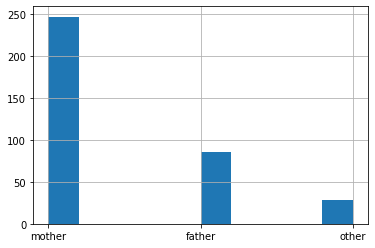

In [213]:
df.guardian.hist()
display(rasp('guardian'))
display(uniq('guardian'))

In [214]:
change_max('guardian')  # заменим на самое часто встречающееся значение все None
df.guardian.unique()

array(['mother', 'father', 'other'], dtype=object)

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

,traveltime
1.0,241
2.0,94
3.0,22
4.0,7


array([ 2.,  1.,  3., nan,  4.])

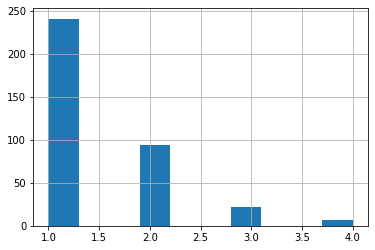

In [215]:
df.traveltime.hist()
display(rasp('traveltime'))
display(uniq('traveltime'))

In [216]:
change_max('traveltime')  # заменим на максимальное значение все None
df.traveltime.unique()

array([2., 1., 3., 4.])

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

,studytime
2.0,193
1.0,102
3.0,64
4.0,26


array([ 2.,  3.,  1., nan,  4.])

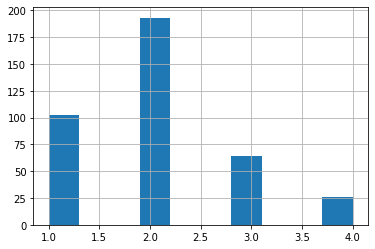

In [217]:
df.studytime.hist()
display(rasp('studytime'))
display(uniq('studytime'))

In [218]:
change_mode('studytime')  # заменим на максимальное значение все None
df.studytime.unique()

array([2., 3., 1., 4.])

failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

,failures
0.0,292
1.0,49
2.0,16
3.0,14


array([ 0.,  3., nan,  2.,  1.])

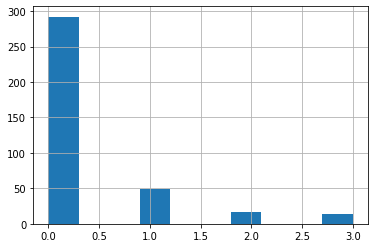

In [219]:
df.failures.hist()
display(rasp('failures'))
display(uniq('failures'))

In [220]:
change_max('failures')  # заменим на самое встречающееся значение все None
df.failures.unique()

array([0., 3., 2., 1.])

schoolsup — дополнительная образовательная поддержка (yes или no)

,schoolsup
no,332
yes,51


array(['yes', 'no', None], dtype=object)

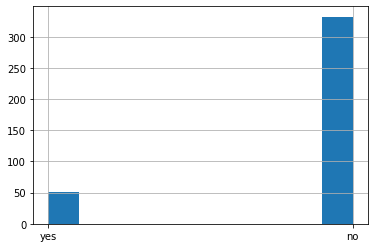

In [221]:
df.schoolsup.hist()
display(rasp('schoolsup'))
display(uniq('schoolsup'))

In [222]:
df['schoolsup'].loc[df["schoolsup"] == 4] = 'yes'  # заменим ошибочное значение 4 на yes

In [223]:
change_max('schoolsup')
print(df.schoolsup.unique())

['yes' 'no']


famsup — семейная образовательная поддержка (yes или no)

,famsup
yes,218
no,135


array(['no', 'yes', None], dtype=object)

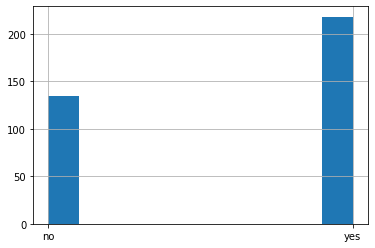

In [224]:
df.famsup.hist()
display(rasp('famsup'))
display(uniq('famsup'))

In [225]:
change_max('famsup')
print(df.famsup.unique())

['no' 'yes']


paid — дополнительные платные занятия по математике (yes или no)

,paid
no,198
yes,154


array(['no', None, 'yes'], dtype=object)

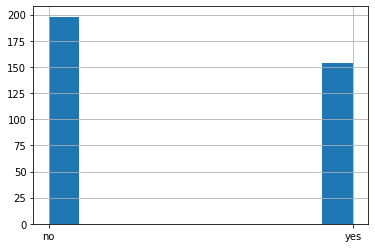

In [226]:
df.paid.hist()
display(rasp('paid'))
display(uniq('paid'))

In [227]:
change_max('paid')
print(df.paid.unique())

['no' 'yes']


activities — дополнительные внеучебные занятия (yes или no)

,activities
yes,193
no,185


array(['no', 'yes', None], dtype=object)

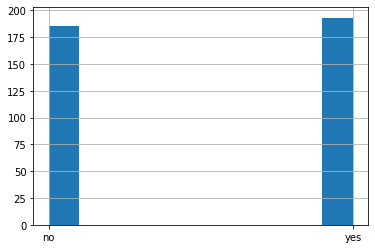

In [228]:
df.activities.hist()
display(rasp('activities'))
display(uniq('activities'))

In [229]:
change_max('activities')
print(df.activities.unique())

['no' 'yes']


nursery — посещал детский сад (yes или no)

,nursery
yes,298
no,78


array(['yes', 'no', None], dtype=object)

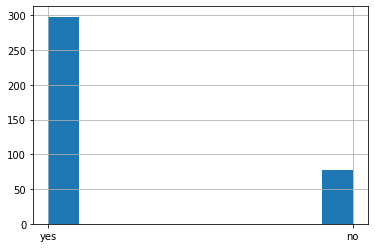

In [230]:
df.nursery.hist()
display(rasp('nursery'))
display(uniq('nursery'))

In [231]:
change_max('nursery')
print(df.nursery.unique())

['yes' 'no']


higher — хочет получить высшее образование (yes или no)

,higher
yes,356
no,18


array(['yes', None, 'no'], dtype=object)

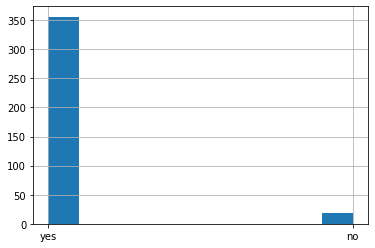

In [232]:
df.higher.hist()
display(rasp('higher'))
display(uniq('higher'))

In [233]:
change_max('higher')
print(df.nursery.unique())

['yes' 'no']


internet — наличие интернета дома (yes или no)

,internet
yes,302
no,56


array([None, 'yes', 'no'], dtype=object)

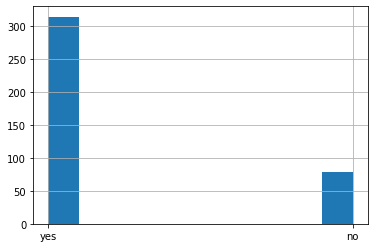

In [234]:
df.nursery.hist()
display(rasp('internet'))
display(uniq('internet'))

In [235]:
change_max('internet')
print(df.nursery.unique())

['yes' 'no']


romantic — в романтических отношениях (yes или no)

,romantic
no,239
yes,122


array(['no', None, 'yes'], dtype=object)

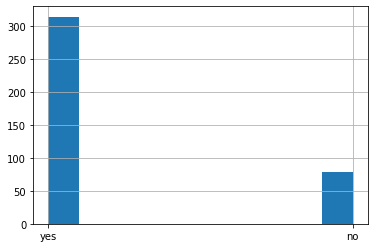

In [236]:
df.nursery.hist()
display(rasp('romantic'))
display(uniq('romantic'))

In [237]:
change_max('romantic')
print(df.nursery.unique())

['yes' 'no']


famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

,famrel
4.0,181
5.0,98
3.0,61
2.0,17
1.0,7
-1.0,1


array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

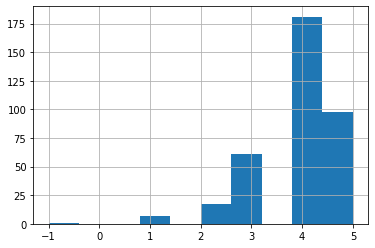

In [238]:
df.famrel.hist()
display(rasp('famrel'))
display(uniq('famrel'))

In [239]:
df['famrel'].loc[df["famrel"] == -1] = 1 ## заменим ошибочное значение -1 на 1
change_mode('famrel')
print(df.famrel.unique())

[4. 5. 3. 1. 2.]


freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

,freetime
3.0,152
4.0,110
2.0,63
5.0,38
1.0,18


array([ 3.,  2.,  4.,  1.,  5., nan])

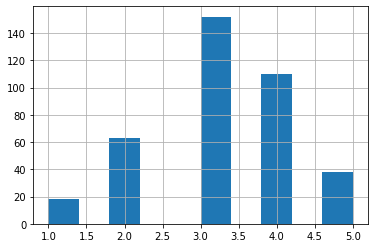

In [240]:
df.freetime.hist()
display(rasp('freetime'))
display(uniq('freetime'))

In [241]:
change_mode('freetime')
print(df.freetime.unique())

[3. 2. 4. 1. 5.]


goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

,goout
3.0,126
2.0,100
4.0,84
5.0,51
1.0,23


array([ 4.,  3.,  2.,  1.,  5., nan])

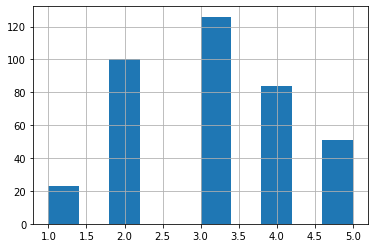

In [242]:
df.goout.hist()
display(rasp('goout'))
display(uniq('goout'))

In [243]:
change_mode('goout')
print(df.goout.unique())

[4. 3. 2. 1. 5.]


health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

,health
5.0,138
3.0,88
4.0,63
1.0,45
2.0,43


array([ 3.,  5.,  1.,  2.,  4., nan])

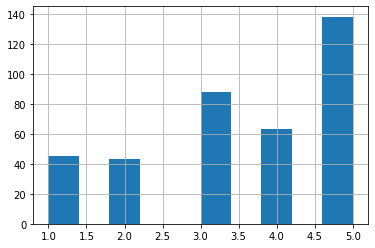

In [244]:
df.health.hist()
display(rasp('health'))
display(uniq('health'))

In [245]:
change_mode('health')
print(df.health.unique())

[3. 5. 1. 2. 4.]


absences — количество пропущенных занятий

,absences
0.0,111
2.0,59
4.0,53
6.0,31
8.0,20
10.0,17
12.0,12
14.0,12
3.0,8
16.0,6


array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

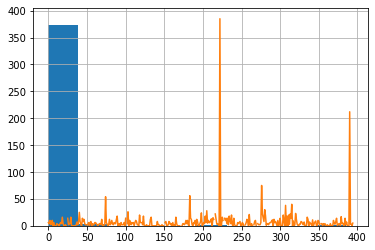

In [246]:
df.absences.hist()
plt.plot(df.absences)
display(rasp('absences'))
display(uniq('absences'))

Мы видим выброс, рассмотрим его детально ниже

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


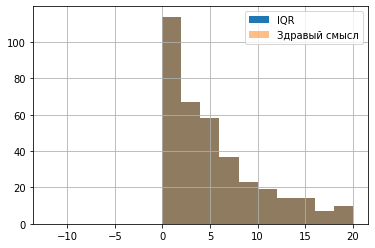

In [247]:
# посмотрим границы выбросов
median = df.absences.median()
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df.absences.loc[df.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(-12, 20), label='IQR')
df.absences.loc[df.absences <= 100].hist(
    alpha=0.5, bins=16, range=(-12, 20), label='Здравый смысл')
plt.legend()

In [248]:
change_mode('absences')
print(df.absences.unique())

[  6.   4.  10.   2.   0.  16.  14.   7.   8.  25.  12.  54.  18.  26.
  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.  30.
  19.   9.  11.  38.  40.  23.  17. 212.]


Удалим выбросы: 

In [249]:
df = df.loc[df.absences <= 210]
display(df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


score — баллы по госэкзамену по математике. Самый важный показатель, который можно предсказывать

,score
50.0,53
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,26
80.0,15


array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

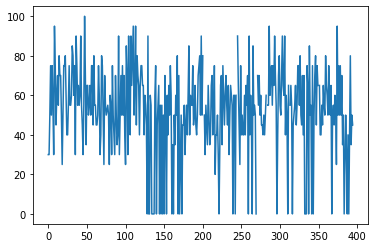

In [250]:
plt.plot(df.score)
display(rasp('score'))
display(uniq('score'))

In [251]:
change_mode('score')
df.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  20.])

Мы видим, что оценка была по 100 бальной системе. Один ученик написал тест на 100 баллов. Много значений 0, которое говорит о том, что ученик не явился, либо сдал пустой лист, также мы добавили значение 0 для учеников, бал которых не внесен nan.

Studytime_granular

,studytime_granular
-6.0,191
-3.0,102
-9.0,64
-12.0,26


array([ -6.,  -9.,  -3.,  nan, -12.])

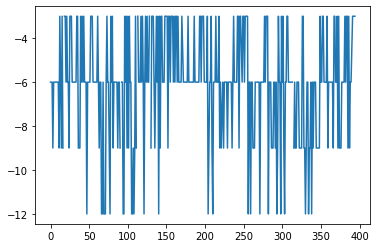

In [252]:
plt.plot(df.studytime_granular)
display(rasp('studytime_granular'))
display(uniq('studytime_granular'))

In [253]:
change_mode('studytime_granular')
df.studytime_granular.unique()

array([ -6.,  -9.,  -3., -12.])

Проверим нулевые значения: 

In [254]:
df.isnull().sum(axis = 0)

school                0
sex                   0
age                   0
address               0
famsize               0
pstatus               0
medu                  0
fedu                  0
mjob                  0
fjob                  0
reason                0
guardian              0
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
studytime_granular    0
higher                0
internet              0
romantic              0
famrel                0
freetime              0
goout                 0
health                0
absences              0
score                 0
dtype: int64

# 2. Первичный анализ данных в столбцах

Score - Мы видим, что оценка была по 100 бальной системе. Один ученик написал тест на 100 баллов. Много значений 0, которое говорит о том, что ученик не явился, либо сдал пустой лист, также мы добавили значение 0 для учеников, бал которых не внесен nan. В среднем ученики написали экзамен на 50 баллов.

In [255]:
df.score.describe()

count    390.000000
mean      52.128205
std       22.775511
min        0.000000
25%       40.000000
50%       55.000000
75%       68.750000
max      100.000000
Name: score, dtype: float64

# 3. Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой за экзамен. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

In [256]:
display(df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


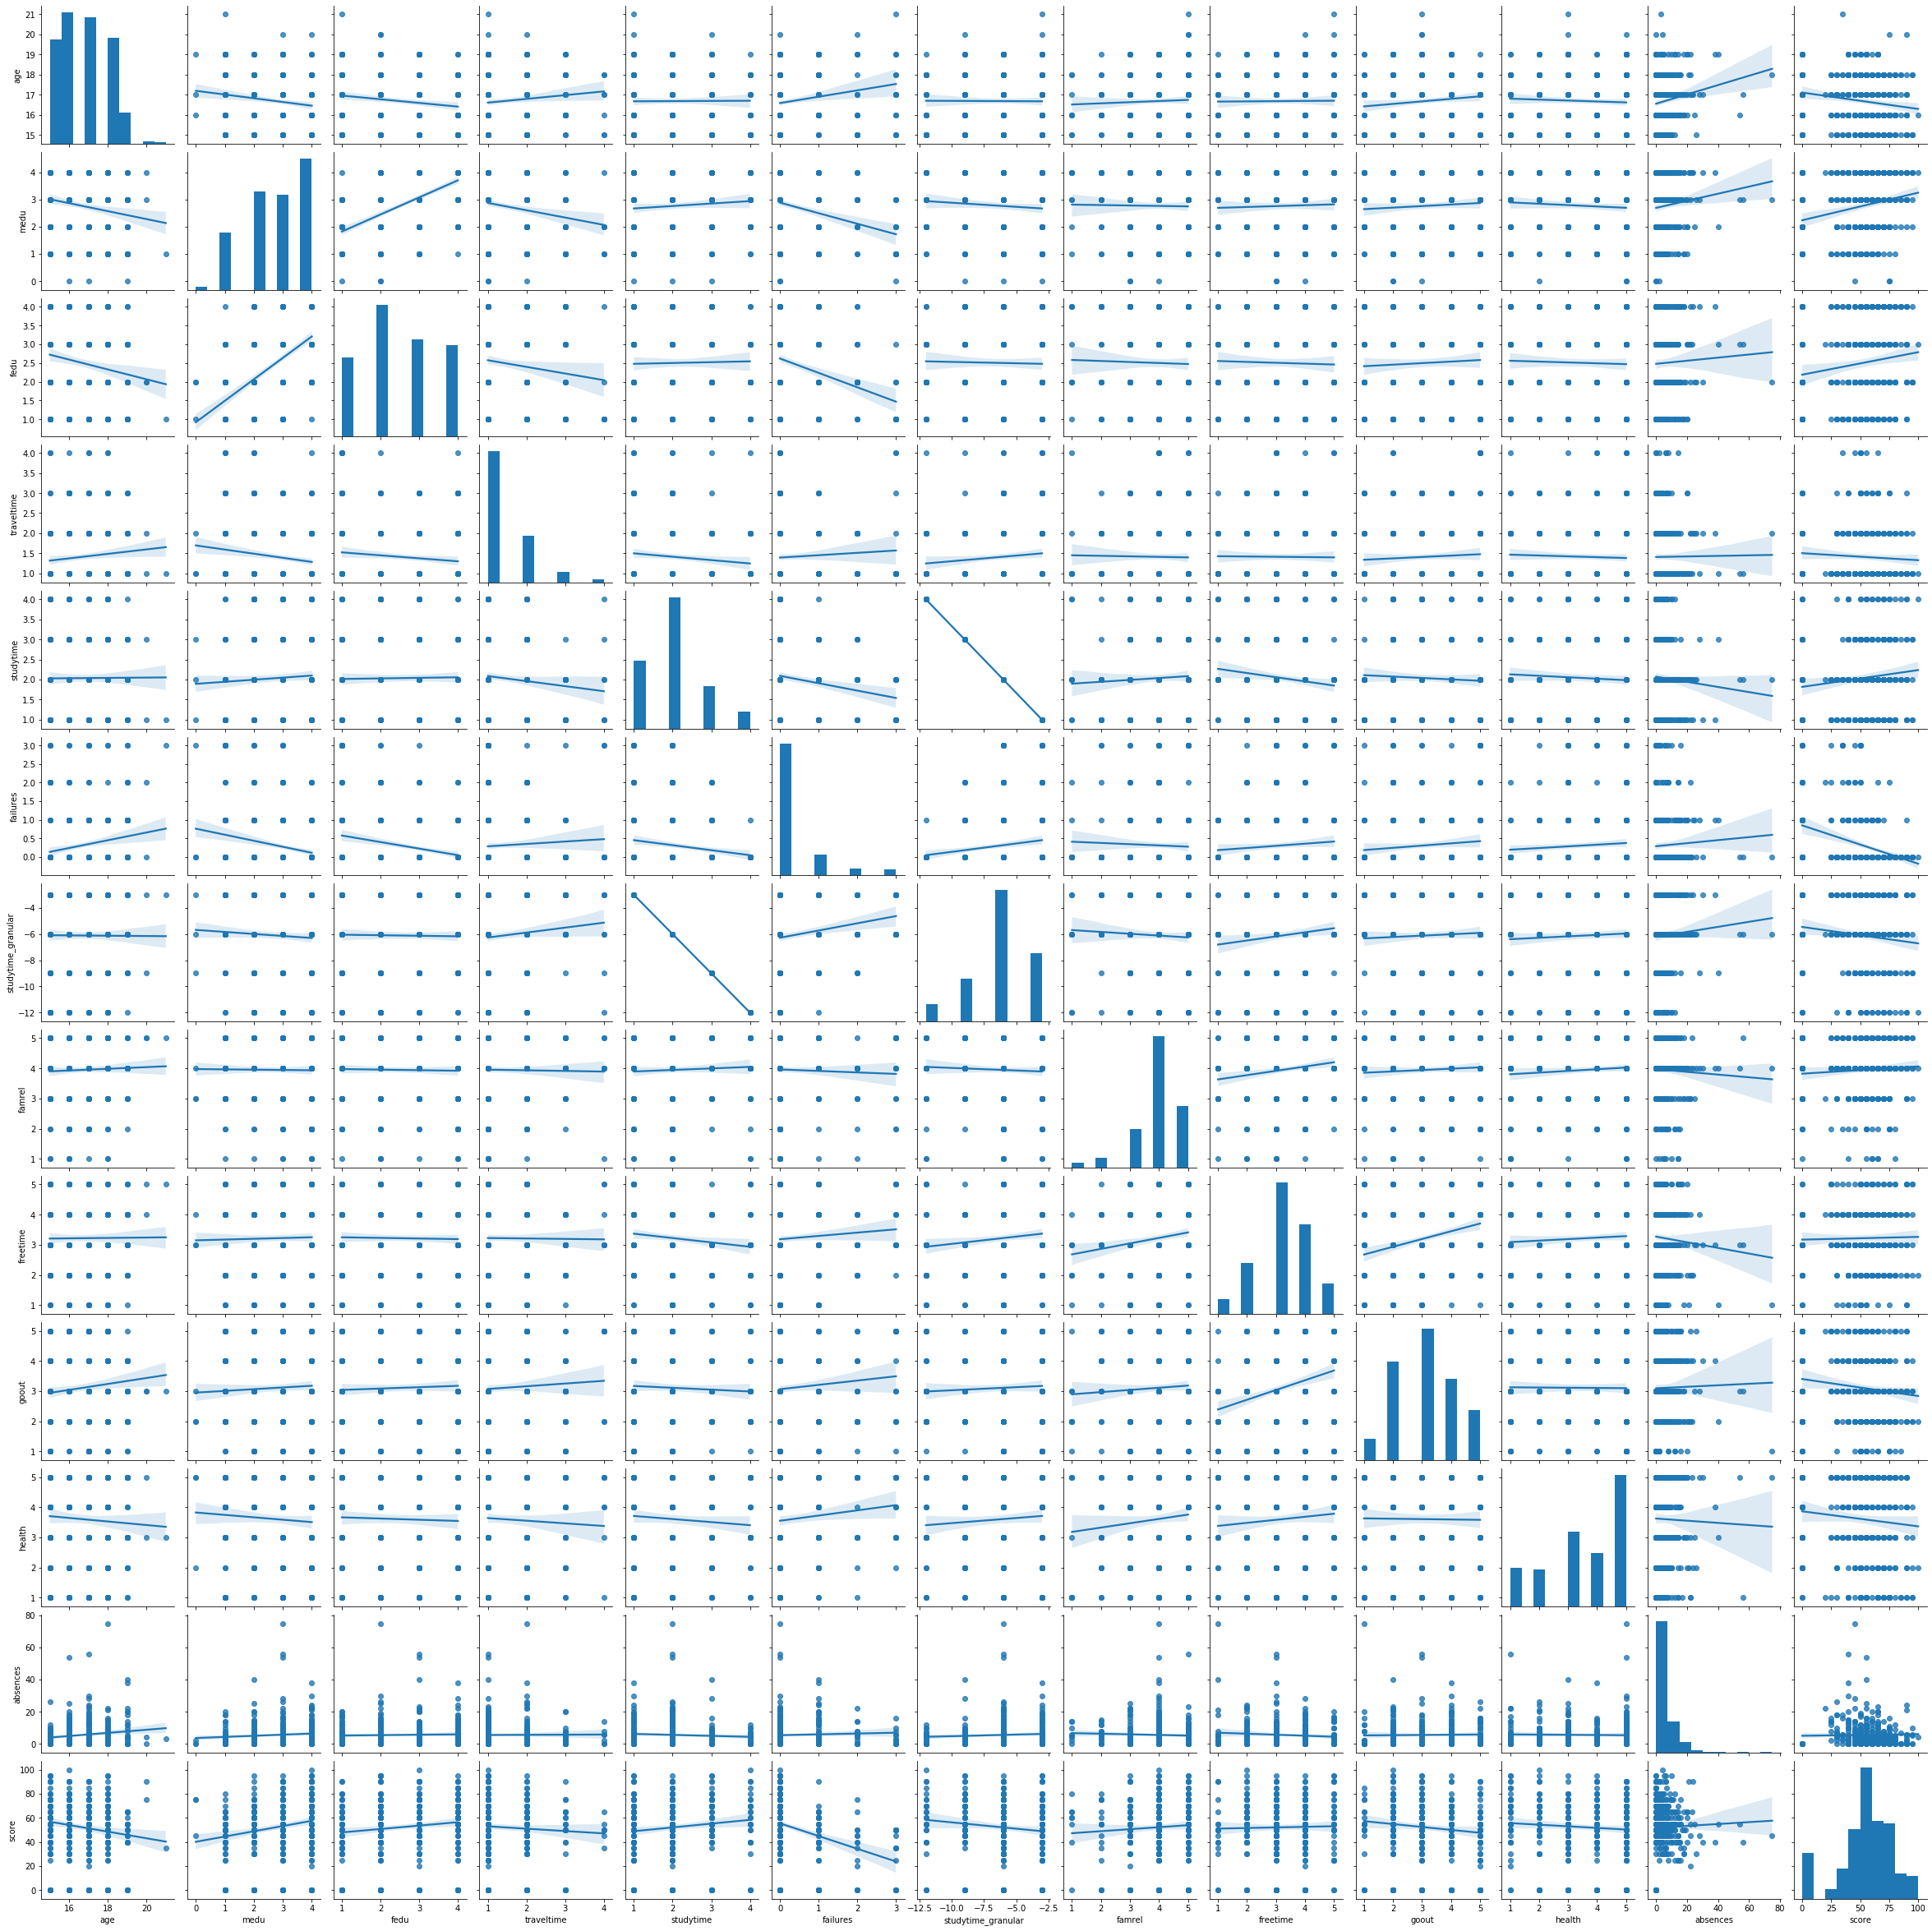

In [257]:
sns.pairplot(df, kind='reg')

Используем для наглядности матрицу корреляций:

In [258]:
df.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164447,-0.155180,0.102172,0.006103,0.181713,-0.006103,0.039738,0.008503,0.111222,-0.052470,0.149930,-0.149780
medu,-0.164447,1.000000,0.599055,-0.166585,0.068263,-0.250893,-0.068263,-0.012710,0.028717,0.056689,-0.063023,0.095058,0.210007
fedu,-0.155180,0.599055,1.000000,-0.114701,0.017530,-0.260321,-0.017530,-0.022408,-0.021738,0.043136,-0.030026,0.031648,0.130284
traveltime,0.102172,-0.166585,-0.114701,1.000000,-0.103050,0.061866,0.103050,-0.016740,-0.010217,0.055919,-0.042848,0.008154,-0.058608
studytime,0.006103,0.068263,0.017530,-0.103050,1.000000,-0.157548,-1.000000,0.048820,-0.122927,-0.046248,-0.060807,-0.061772,0.114615
failures,0.181713,-0.250893,-0.260321,0.061866,-0.157548,1.000000,0.157548,-0.040724,0.079537,0.092761,0.088267,0.045932,-0.329918
studytime_granular,-0.006103,-0.068263,-0.017530,0.103050,-1.000000,0.157548,1.000000,-0.048820,0.122927,0.046248,0.060807,0.061772,-0.114615
famrel,0.039738,-0.012710,-0.022408,-0.016740,0.048820,-0.040724,-0.048820,1.000000,0.161095,0.056827,0.089387,-0.041646,0.063412
freetime,0.008503,0.028717,-0.021738,-0.010217,-0.122927,0.079537,0.122927,0.161095,1.000000,0.288361,0.071037,-0.076577,0.021179
goout,0.111222,0.056689,0.043136,0.055919,-0.046248,0.092761,0.046248,0.056827,0.288361,1.000000,-0.009568,0.018147,-0.116694


Так как переменные studytime и studytime_granular скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная studytime_granular.
В матрице корреляций нет присутствия сильно коррелированных с оценкой переменных, а также присутствуют обратные корреляции. Интересна высокая положительная корреляция между образованием отца и матери, а также корреляция между возрастом и количеством пропущенных занятий и временем, проведенным с друзьями, чем взрослее ученик, тем чаще он пропускает занятие. Образование матери и отца прямым образом влияет на количество неудач ученика, чем выше образование родителей, тем меньше неудач.

Можно сделать вывод, что на бал за экзамен положительно влияют: образование матери и отца, причем матери больше. Влияет также время, уделенное учебе. Отрицательно влияет на бал количество внеучебных неудач и длительное время, проведенное с друзьями.

# 4. Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения оценки за экзамен в зависимости от значения этих переменных. 

Номинативные переменные, которые осталось рассмотреть: 'school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime_granular', 'higher', 'internet', 'romantic'. 

In [259]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

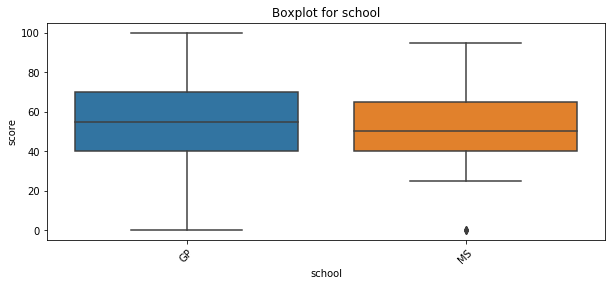

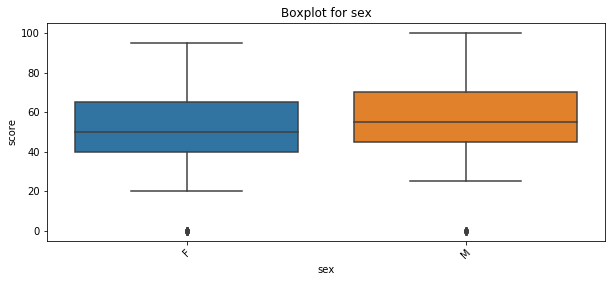

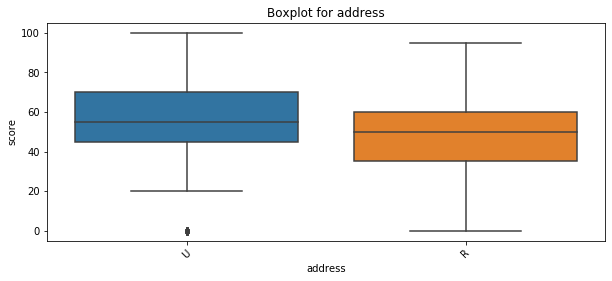

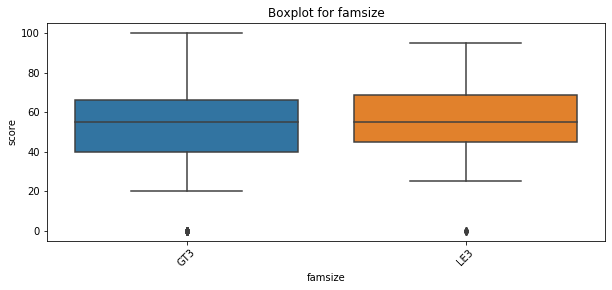

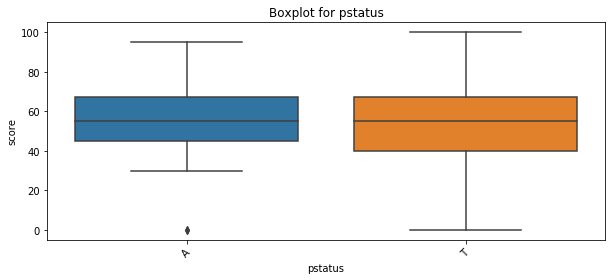

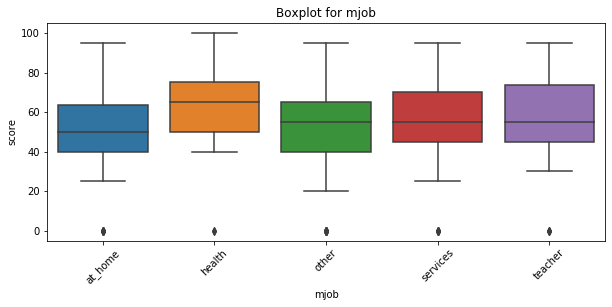

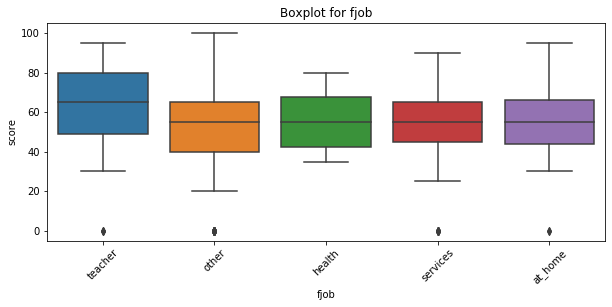

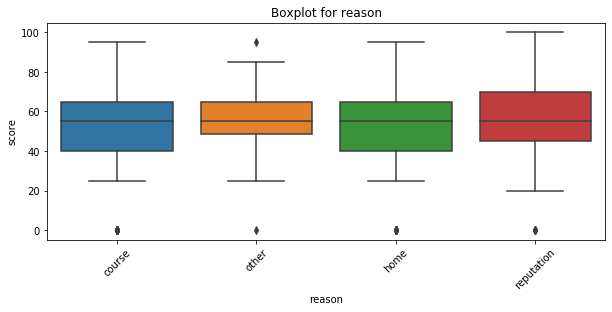

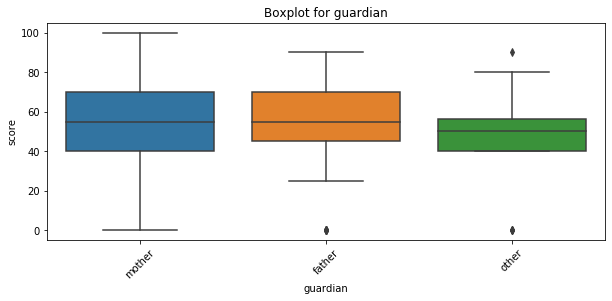

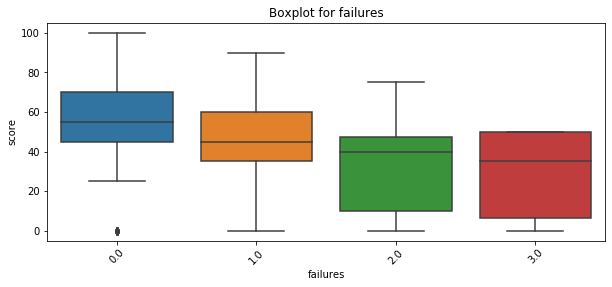

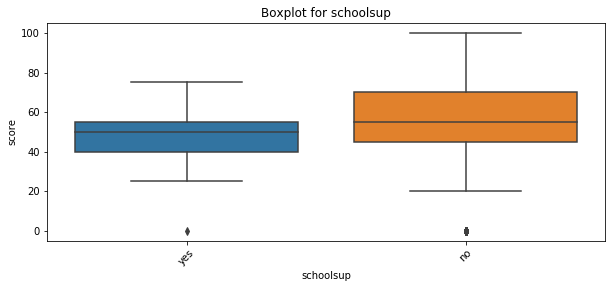

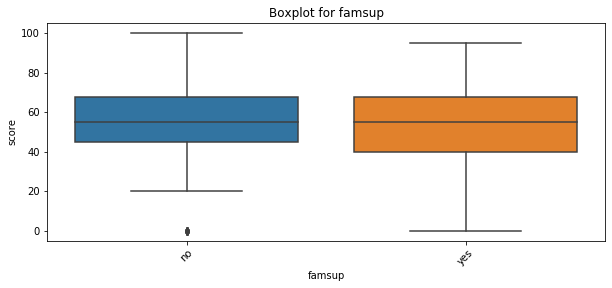

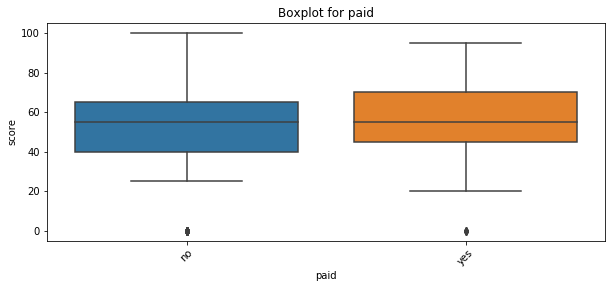

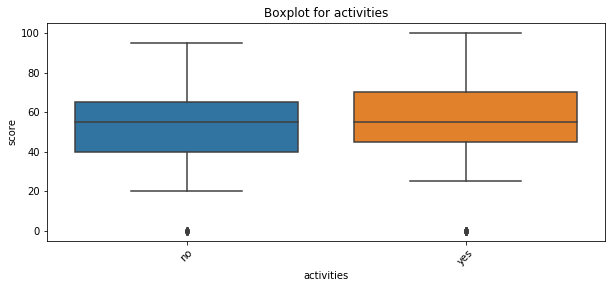

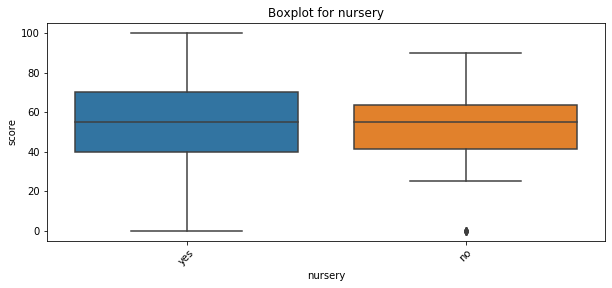

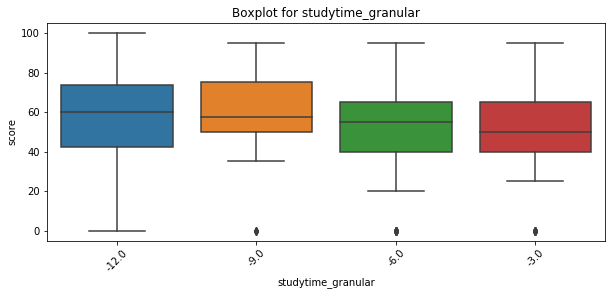

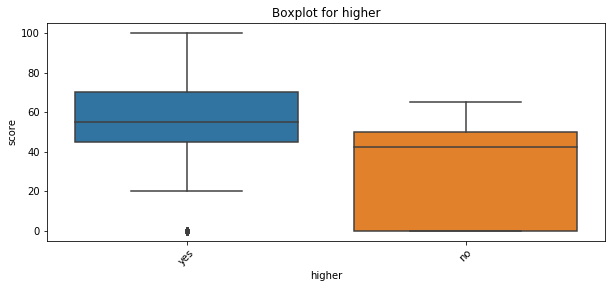

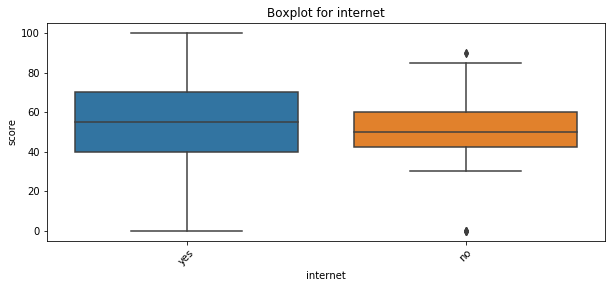

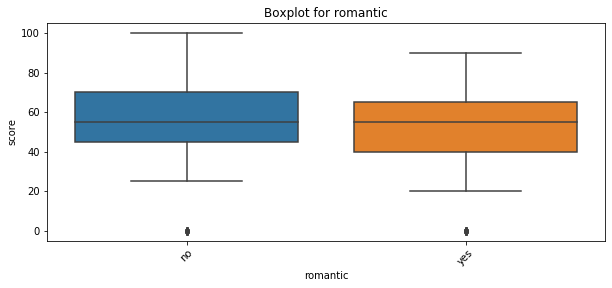

In [260]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime_granular', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам можно заключить следующее: 
в школе GP у учеников немного больше шанс получить бал выше, у мальчиков в среднем бал немного выше, сильное влияение на оценку оказвает удаленное проживание от школы (чем дальше проживание, тем хуже оценка). Практически не важен размер семьи и статус совместного жилья родителей. Интересная закономерность в связи с работой матери, работа в здравохранении и учителем оказывает положительное влияние на оценку. Сильно влияение можно наблюдать, если отец работает учителем, оценка резко становится более высокой. Более низкие оценки получают ученики, чьи опекуны не являются родителями, также наличие неудач сильно влияет на оценку в отрицательную сторону. Можно сделать странный вывод, что для успешной оценки важно отсутствие школьной образовательной поддержки, и практически не важна образовательная поддержка дома, а также наличие платных курсов по математике, но в данном случае надо быть особенно аккуратными с выводами, т.к. по этим значениям больше всего пропусков данных (nan). 
Также не сильноважно посещал ли ребенок детский сад. Желание получить высшее образование и наличие интернета сильно влияет на оценку в положительную сторону. Хотя по колонке интернет много пропусков в данных, что может давать ложный вывод. 

In [261]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [262]:
for col in ['school', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime_granular', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются три параметра: address, mjob, failures,  higher и  romantic. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае оставим только важные переменные, которые, возможно, оказывают влияние на оценку, и удалим не сильно значимые: 'pstatus', 'reason', 'famsup', 'famrel', 'health', 'famreal'.
Переменную 'studytime_granular' - удалим как коррелирующую с переменной 'studytime'

In [263]:
df_for_model = df.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'medu',
              'fedu', 'mjob', 'fjob', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'paid', 'activities', 'nursery',
              'studytime_granular', 'higher', 'internet', 'romantic', 
               'goout', 'absences', 'score']]
df_for_model.head()

,school,sex,age,address,famsize,medu,fedu,mjob,fjob,guardian,traveltime,studytime,failures,schoolsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,goout,absences,score
0,GP,F,18,U,GT3,4.0,4.0,at_home,teacher,mother,2.0,2.0,0.0,yes,no,no,yes,-6.0,yes,yes,no,4.0,6.0,30.0
1,GP,F,17,U,GT3,1.0,1.0,at_home,other,father,1.0,2.0,0.0,no,no,no,no,-6.0,yes,yes,no,3.0,4.0,30.0
2,GP,F,15,U,LE3,1.0,1.0,at_home,other,mother,1.0,2.0,3.0,yes,no,no,yes,-6.0,yes,yes,no,2.0,10.0,50.0
3,GP,F,15,U,GT3,4.0,2.0,health,other,mother,1.0,3.0,0.0,no,yes,yes,yes,-9.0,yes,yes,yes,2.0,2.0,75.0
4,GP,F,16,U,GT3,3.0,3.0,other,other,father,1.0,2.0,0.0,no,yes,no,yes,-6.0,yes,no,no,2.0,4.0,50.0


# 2.7. Выводы

В результате EDA для анализа влияния параметров учебы на оценку финального экзамена были получены следующие выводы:

В данных достаточно мало пустых значений, существуют единичные ошибочные значения, которые логично поддаются корректировке.
Выбросы найдены только в столбцах с количеством пропущенных занятий, образованием родителей  и возрастом ученика, что позволяет сделать вывод о том, что данные достаточно чистые.
В матрице корреляций нет присутствия сильно скоррелированных с оценкой переменных, что не позволяет удалить или пренебречь столбцами таблицы, а также присутствуют обратные корреляции.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это -'school','age', sex','address','mjob','fjob','guardian', 'failures','higher','romantic'.